<a href="https://colab.research.google.com/github/ricecakeblack/DataScience/blob/master/3_CNN_with_small_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
keras.__version__

'2.6.0'

## 데이터 내려받기

여기서 사용할 강아지 vs. 고양이 데이터셋은 케라스에 포함되어 있지 않습니다. 컨브넷이 주류가 되기 전인 2013년 후반에 캐글에서 컴퓨터 비전 경연 대회의 일환으로 이 데이터셋을 만들었습니다. 원본 데이터셋을 `https://www.kaggle.com/c/dogs-vs-cats/data`에서 내려받을 수 있습니다(캐글 계정이 없다면 하나 만들어야 하지만 계정을 만드는 과정은 간단합니다). 실습의 편의를 위해서 번역서의 깃허브에는 이 데이터셋을 미리 다운로드하여 포함하였습니다.

이 사진들은 중간 정도의 해상도를 가진 컬러 JPEG 파일입니다. 다음이 몇 개 샘플입니다:

![cats_vs_dogs_samples](https://s3.amazonaws.com/book.keras.io/img/ch5/cats_vs_dogs_samples.jpg)

당연히 2013년 강아지 vs. 고양이 캐글 경연은 컨브넷을 사용한 참가자가 우승하였습니다. 최고 성능은 95%의 정확도를 달성했습니다. 이 예제를 가지고 (다음 절에서) 참가자들이 사용했던 데이터의 10%보다 적은 양으로 모델을 훈련하고도 이와 아주 근접한 정확도를 달성해 보겠습니다.

이 데이터셋은 25,000개의 강아지와 고양이 이미지(클래스마다 12,500개)를 담고 있고 (압축해서) 543MB 크기입니다. 다운로드하고 압축을 해제한 후 세 개의 서브셋이 들어 있는 새로운 데이터셋을 만들 것입니다. 클래스마다 1,000개의 샘플로 이루어진 훈련 세트, 클래스마다 500개의 샘플로 이루어진 검증 세트, 클래스마다 500개의 샘플로 이루어진 테스트 세트입니다.

다음은 이를 처리하는 코드입니다:

In [ ]:
# 강아지와 고양이 이미지 각 2000장을 사용하기 위해 데이터 다운로드
!git clone https://github.com/gilbutITbook/006975.git

fatal: destination path '006975' already exists and is not an empty directory.


In [ ]:
# github에서 이미지 파일들을 모두 다운로드 했는지 확인
import os

fileList = os.listdir('/content/006975/datasets/cats_and_dogs/train')
print(len(fileList))

4000


In [ ]:
# os 모듈은 파일 액세스와 관련된 함수들을 지원
# shutil 모듈은 Linux에서 shell은 터미널에서 사용하는 명령을 python에서
# 사용할 수 있게 지원한다.

import os, shutil

In [ ]:
# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = '/content/006975/datasets/cats_and_dogs/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = '/content/006975/datasets/cats_and_dogs_small/'

## 1. 폴더별로 train,valid,test를 생성
## 2. train폴더 안에서도 cat폴더와 dog폴더를 생성
## 총 6개의 폴더를 생성

In [ ]:
base_dir

'/content/006975/datasets/cats_and_dogs_small/'

In [ ]:
if os.path.exists(base_dir):  # 만약, base_dir폴더가 존재한다면
    # 폴더안에 파일이 존재하더라도 무시하고 폴더를 삭제
    shutil.rmtree(base_dir)   # 반복적인 실행을 위해 디렉토리를 삭제합니다.

os.mkdir(base_dir)

In [ ]:
# 훈련, 검증, 테스트 분할을 위한 디렉터리
# os.path.join는 경로 문자열을 관리할때 편하다.
train_dir = os.path.join(base_dir, 'train')
train_dir

'/content/006975/datasets/cats_and_dogs_small/train'

In [ ]:
os.mkdir(train_dir)

In [ ]:
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [ ]:
# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [ ]:
# 복사하기전 원본 폴더에 파일 확인
!ls /content/006975/datasets/cats_and_dogs/train

cat.0.jpg     cat.1720.jpg  cat.640.jpg   dog.1360.jpg	dog.280.jpg
cat.1000.jpg  cat.1721.jpg  cat.641.jpg   dog.1361.jpg	dog.281.jpg
cat.1001.jpg  cat.1722.jpg  cat.642.jpg   dog.1362.jpg	dog.282.jpg
cat.1002.jpg  cat.1723.jpg  cat.643.jpg   dog.1363.jpg	dog.283.jpg
cat.1003.jpg  cat.1724.jpg  cat.644.jpg   dog.1364.jpg	dog.284.jpg
cat.1004.jpg  cat.1725.jpg  cat.645.jpg   dog.1365.jpg	dog.285.jpg
cat.1005.jpg  cat.1726.jpg  cat.646.jpg   dog.1366.jpg	dog.286.jpg
cat.1006.jpg  cat.1727.jpg  cat.647.jpg   dog.1367.jpg	dog.287.jpg
cat.1007.jpg  cat.1728.jpg  cat.648.jpg   dog.1368.jpg	dog.288.jpg
cat.1008.jpg  cat.1729.jpg  cat.649.jpg   dog.1369.jpg	dog.289.jpg
cat.1009.jpg  cat.172.jpg   cat.64.jpg	  dog.136.jpg	dog.28.jpg
cat.100.jpg   cat.1730.jpg  cat.650.jpg   dog.1370.jpg	dog.290.jpg
cat.1010.jpg  cat.1731.jpg  cat.651.jpg   dog.1371.jpg	dog.291.jpg
cat.1011.jpg  cat.1732.jpg  cat.652.jpg   dog.1372.jpg	dog.292.jpg
cat.1012.jpg  cat.1733.jpg  cat.653.jpg   dog.1373.jpg	dog.293.jp

In [ ]:
test = 123
a = 1
b = 2
c = 3
print('test={}'.format(test))
print('a={}, b={}, c={}'.format(a,b,c))

test=123
a=1, b=2, c=3


## 각 클래스별로 train 1000장, valid 500장, test 500장

In [ ]:
# cat.0.jpg ~ cat.999.jpg
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]

In [ ]:
fnames

['cat.0.jpg',
 'cat.1.jpg',
 'cat.2.jpg',
 'cat.3.jpg',
 'cat.4.jpg',
 'cat.5.jpg',
 'cat.6.jpg',
 'cat.7.jpg',
 'cat.8.jpg',
 'cat.9.jpg',
 'cat.10.jpg',
 'cat.11.jpg',
 'cat.12.jpg',
 'cat.13.jpg',
 'cat.14.jpg',
 'cat.15.jpg',
 'cat.16.jpg',
 'cat.17.jpg',
 'cat.18.jpg',
 'cat.19.jpg',
 'cat.20.jpg',
 'cat.21.jpg',
 'cat.22.jpg',
 'cat.23.jpg',
 'cat.24.jpg',
 'cat.25.jpg',
 'cat.26.jpg',
 'cat.27.jpg',
 'cat.28.jpg',
 'cat.29.jpg',
 'cat.30.jpg',
 'cat.31.jpg',
 'cat.32.jpg',
 'cat.33.jpg',
 'cat.34.jpg',
 'cat.35.jpg',
 'cat.36.jpg',
 'cat.37.jpg',
 'cat.38.jpg',
 'cat.39.jpg',
 'cat.40.jpg',
 'cat.41.jpg',
 'cat.42.jpg',
 'cat.43.jpg',
 'cat.44.jpg',
 'cat.45.jpg',
 'cat.46.jpg',
 'cat.47.jpg',
 'cat.48.jpg',
 'cat.49.jpg',
 'cat.50.jpg',
 'cat.51.jpg',
 'cat.52.jpg',
 'cat.53.jpg',
 'cat.54.jpg',
 'cat.55.jpg',
 'cat.56.jpg',
 'cat.57.jpg',
 'cat.58.jpg',
 'cat.59.jpg',
 'cat.60.jpg',
 'cat.61.jpg',
 'cat.62.jpg',
 'cat.63.jpg',
 'cat.64.jpg',
 'cat.65.jpg',
 'cat.66.jpg',
 'cat

In [ ]:
# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
for fname in fnames:
    # 원본 이미지가 저장된 폴더 + 파일명
    src = os.path.join(original_dataset_dir, fname)

    # 복사해서 가져다 놓을 폴더 + 파일명
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
print(os.listdir(train_cats_dir))
print(len(os.listdir(train_cats_dir)))

['cat.301.jpg', 'cat.912.jpg', 'cat.564.jpg', 'cat.74.jpg', 'cat.63.jpg', 'cat.622.jpg', 'cat.552.jpg', 'cat.182.jpg', 'cat.431.jpg', 'cat.664.jpg', 'cat.901.jpg', 'cat.655.jpg', 'cat.287.jpg', 'cat.507.jpg', 'cat.332.jpg', 'cat.11.jpg', 'cat.589.jpg', 'cat.548.jpg', 'cat.897.jpg', 'cat.72.jpg', 'cat.81.jpg', 'cat.440.jpg', 'cat.521.jpg', 'cat.499.jpg', 'cat.154.jpg', 'cat.7.jpg', 'cat.527.jpg', 'cat.473.jpg', 'cat.362.jpg', 'cat.437.jpg', 'cat.179.jpg', 'cat.441.jpg', 'cat.931.jpg', 'cat.228.jpg', 'cat.246.jpg', 'cat.921.jpg', 'cat.149.jpg', 'cat.131.jpg', 'cat.694.jpg', 'cat.65.jpg', 'cat.249.jpg', 'cat.34.jpg', 'cat.90.jpg', 'cat.265.jpg', 'cat.795.jpg', 'cat.654.jpg', 'cat.832.jpg', 'cat.847.jpg', 'cat.122.jpg', 'cat.33.jpg', 'cat.808.jpg', 'cat.267.jpg', 'cat.638.jpg', 'cat.989.jpg', 'cat.225.jpg', 'cat.639.jpg', 'cat.417.jpg', 'cat.489.jpg', 'cat.868.jpg', 'cat.643.jpg', 'cat.653.jpg', 'cat.667.jpg', 'cat.753.jpg', 'cat.962.jpg', 'cat.651.jpg', 'cat.578.jpg', 'cat.729.jpg', 'cat.

In [ ]:
# 고양이 2000 => 1000(train) + 500(validation)+ 500(test)
# 강아지 2000 => 1000(train) + 500(validation)+ 500(test)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

복사가 잘 되었는지 확인하기 위해 각 분할(훈련/검증/테스트)에 들어 있는 사진의 개수를 카운트해 보죠:

In [ ]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))

훈련용 고양이 이미지 전체 개수: 1000


In [ ]:
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))

훈련용 강아지 이미지 전체 개수: 1000


In [ ]:
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))

검증용 고양이 이미지 전체 개수: 500


In [ ]:
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))

검증용 강아지 이미지 전체 개수: 500


In [ ]:
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))

테스트용 고양이 이미지 전체 개수: 500


In [ ]:
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

테스트용 강아지 이미지 전체 개수: 500


이제 2,000개의 훈련 이미지, 1,000개의 검증 이미지, 1,000개의 테스트 이미지가 준비되었습니다. 분할된 각 데이터는 클래마다 동일한 개수의 샘플을 포함합니다. 균형잡힌 이진 분류 문제이므로 정확도를 사용해 성공을 측정하겠습니다.

## 네트워크 구성하기

이전 예제에서 MNIST를 위해 간단한 컨브넷을 만들었습니다. 이제 컨브넷에 친숙해졌을 것입니다. 여기서 사용할 구조도 일반적으로 동일합니다. `Conv2D`(`relu` 활성화 함수 사용)와 `MaxPooling2D` 층을 번갈아 쌓은 컨브넷을 만들겠습니다.

이전보다 이미지가 크고 복잡한 문제이기 때문에 네트워크를 좀 더 크게 만들겠습니다. `Conv2D` + `MaxPooling2D` 단계를 하나 더 추가합니다. 이렇게 하면 네트워크의 용량을 늘리고 `Flatten` 층의 크기가 너무 커지지 않도록 특성 맵의 크기를 줄일 수 있습니다. 150 × 150 크기(임의로 선택한 것입니다)의 입력으로 시작해서 `Flatten` 층 이전에 7 × 7 크기의 특성 맵으로 줄어듭니다.

특성 맵의 깊이는 네트워크에서 점진적으로 증가하지만(32에서 128까지), 특성 맵의 크기는 감소합니다(150 × 150에서 7 × 7까지). 이는 거의 모든 컨브넷에서 볼 수 있는 전형적인 패턴입니다.

이진 분류 문제이므로 네트워크는 하나의 유닛(크기가 1인 `Dense` 층)과 `sigmoid` 활성화 함수로 끝납니다. 이 유닛은 한 클래스에 대한 확률을 인코딩할 것입니다.

In [ ]:
# Hyperparameter
IMG_W = 150
IMG_H = 150
IMG_C = 3
BATCH_SIZE = 32
EPOCH = 30

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()

#입력 이미지 150x150,3 (컬러이미지)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_H, IMG_W, IMG_C)))
model.add(layers.MaxPooling2D((2, 2)))

# 입력 이미지 74x74,32
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# 입력 이미지 36x36,64
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Classifier를 구성하는데 0,1인지로 판단하는 이진 분류기
# sigmoid는 이진 분류기에서 사용
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

층들을 거치면서 특성 맵의 차원이 어떻게 변하는지 살펴보겠습니다:

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

컴파일 단계에서 이전과 같이 `RMSprop` 옵티마이저를 선택하겠습니다. 네트워크의 마지막이 하나의 시그모이드 유닛이기 때문에 이진 크로스엔트로피(binary crossentropy)를 손실로 사용합니다(4장 5절에서 다양한 경우에 사용할 수 있는 손실 함수 목록을 볼 수 있습니다).

In [ ]:
from tensorflow.keras import optimizers

#이진 분류 모델에서는 binary_crossentropy를 사용
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

## 데이터 전처리

데이터는 네트워크에 주입되기 전에 부동 소수 타입의 텐서로 적절하게 전처리되어 있어야 합니다. 지금은 데이터가 JPEG 파일로 되어 있으므로 네트워크에 주입하려면 대략 다음 과정을 따릅니다.

1.	사진 파일을 읽습니다.
2.	JPEG 콘텐츠를 RGB 픽셀 값으로 디코딩합니다.
3.	그다음 부동 소수 타입의 텐서로 변환합니다.
4.	픽셀 값(0에서 255 사이)의 스케일을 [0, 1] 사이로 조정합니다(신경망은 작은 입력 값을 선호합니다).

좀 복잡하게 보일 수 있지만 다행히 케라스는 이런 단계를 자동으로 처리하는 유틸리티를 가지고 있습니다. 케라스는 `keras.preprocessing.image`에 이미지 처리를 위한 헬퍼 도구들을 가지고 있습니다. 특히 `ImageDataGenerator` 클래스는 디스크에 있는 이미지 파일을 전처리된 배치 텐서로 자동으로 바꾸어주는 파이썬 제너레이터를 만들어 줍니다. 이 클래스를 사용해 보겠습니다.

In [ ]:
train_dir

'/content/006975/datasets/cats_and_dogs_small/train'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정합니다
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# flow_from_directory는 폴더로부터 데이터셋을 불러들인다.
train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(IMG_H, IMG_W),
        batch_size=BATCH_SIZE,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(IMG_H, IMG_W),
        batch_size=BATCH_SIZE,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


이 제너레이터의 출력 하나를 살펴보죠. 이 출력은 150 × 150 RGB 이미지의 배치(`(20, 150, 150, 3)` 크기)와 이진 레이블의 배치(`(20,)` 크기)입니다. 각 배치에는 20개의 샘플(배치 크기)이 있습니다. 제너레이터는 이 배치를 무한정 만들어 냅니다. 타깃 폴더에 있는 이미지를 끝없이 반복합니다. 따라서 반복 루프안의 어디에선가 `break` 문을 사용해야 합니다.

In [ ]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (32, 150, 150, 3)
배치 레이블 크기: (32,)


제너레이터를 사용한 데이터에 모델을 훈련시켜 보겠습니다. `fit_generator` 메서드는 `fit` 메서드와 동일하되 데이터 제너레이터를 사용할 수 있습니다. 이 메서드는 첫 번째 매개변수로 입력과 타깃의 배치를 끝없이 반환하는 파이썬 제너레이터를 기대합니다. 데이터가 끝없이 생성되기 때문에 케라스 모델에 하나의 에포크를 정의하기 위해 제너레이터로부터 얼마나 많은 샘플을 뽑을 것인지 알려 주어야 합니다. `steps_per_epoch` 매개변수에서 이를 설정합니다. 제너레이터로부터 `steps_per_epoch` 개의 배치만큼 뽑은 다음, 즉 `steps_per_epoch` 횟수만큼 경사 하강법 단계를 실행한 다음에 훈련 프로세스는 다음 에포크로 넘어갑니다. 여기서는 20개의 샘플이 하나의 배치이므로 2,000개의 샘플을 모두 처리할 때까지 100개의 배치를 뽑을 것입니다.

`fit_generator`를 사용할 때 `fit` 메서드와 마찬가지로 `validation_data` 매개변수를 전달할 수 있습니다. 이 매개변수에는 데이터 제너레이터도 가능하지만 넘파이 배열의 튜플도 가능합니다. `validation_data`로 제너레이터를 전달하면 검증 데이터의 배치를 끝없이 반환합니다. 따라서 검증 데이터 제너레이터에서 얼마나 많은 배치를 추출하여 평가할지 `validation_steps` 매개변수에 지정해야 합니다.

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=2000/BATCH_SIZE,  # 2000 / BATCH_SIZE
      epochs=EPOCH,
      validation_data=validation_generator,
      validation_steps=1000/BATCH_SIZE)

Epoch 1/30
62/62 [==============================] - 9s 133ms/step - loss: 0.6971 - acc: 0.5205 - val_loss: 0.6838 - val_acc: 0.6300
Epoch 2/30
62/62 [==============================] - 8s 129ms/step - loss: 0.6716 - acc: 0.5915 - val_loss: 0.6817 - val_acc: 0.5380
Epoch 3/30
62/62 [==============================] - 8s 127ms/step - loss: 0.6413 - acc: 0.6285 - val_loss: 0.6508 - val_acc: 0.6130
Epoch 4/30
62/62 [==============================] - 8s 127ms/step - loss: 0.5980 - acc: 0.6865 - val_loss: 0.6171 - val_acc: 0.6660
Epoch 5/30
62/62 [==============================] - 8s 125ms/step - loss: 0.5690 - acc: 0.6955 - val_loss: 0.7037 - val_acc: 0.6120
Epoch 6/30
62/62 [==============================] - 8s 125ms/step - loss: 0.5317 - acc: 0.7415 - val_loss: 0.5910 - val_acc: 0.6850
Epoch 7/30
62/62 [==============================] - 8s 125ms/step - loss: 0.5045 - acc: 0.7530 - val_loss: 0.6073 - val_acc: 0.6730
Epoch 8/30
62/62 [==============================] - 8s 125ms/step - loss: 0.

훈련이 끝나면 항상 모델을 저장하는 것이 좋은 습관입니다:

In [ ]:
from google.colab import drive

import os
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/kerasModel

/content/drive/MyDrive/kerasModel


In [ ]:
!pwd

/content/drive/MyDrive/kerasModel


In [ ]:
# model.save는 CNN모델 그래프와 weight를 모두 저장한다.
model.save('cats_and_dogs_small_1.h5')

훈련 데이터와 검증 데이터에 대한 모델의 손실과 정확도를 그래프로 나타내 보겠습니다:

In [ ]:
import matplotlib.pyplot as plt

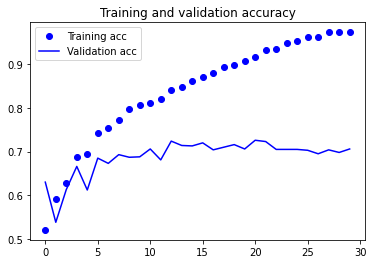

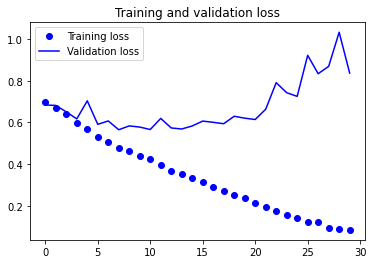

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

이 그래프는 과대적합의 특성을 보여줍니다. 훈련 정확도가 시간이 지남에 따라 선형적으로 증가해서 거의 100%에 도달합니다. 반면 검증 정확도는 70-72%에서 멈추었습니다. 검증 손실은 다섯 번의 에포크만에 최솟값에 다다른 이후에 더 이상 진전되지 않았습니다. 반면 훈련 손실은 거의 0에 도달할 때까지 선형적으로 계속 감소합니다.

비교적 훈련 샘플의 수(2,000개)가 적기 때문에 과대적합이 가장 중요한 문제입니다. 드롭아웃이나 가중치 감소(L2 규제)와 같은 과대적합을 감소시킬 수 있는 여러 가지 기법들을 배웠습니다. 여기에서는 컴퓨터 비전에 특화되어 있어서 딥러닝으로 이미지를 다룰 때 매우 일반적으로 사용되는 새로운 방법인 데이터 증식을 시도해 보겠습니다.

## 데이터 증식 사용하기

과대적합은 학습할 샘플이 너무 적어 새로운 데이터에 일반화할 수 있는 모델을 훈련시킬 수 없기 때문에 발생합니다. 무한히 많은 데이터가 주어지면 데이터 분포의 모든 가능한 측면을 모델이 학습할 수 있을 것입니다. 데이터 증식은 기존의 훈련 샘플로부터 더 많은 훈련 데이터를 생성하는 방법입니다. 이 방법은 그럴듯한 이미지를 생성하도록 여러 가지 랜덤한 변환을 적용하여 샘플을 늘립니다. 훈련 시에 모델이 정확히 같은 데이터를 두 번 만나지 않도록 하는 것이 목표입니다. 모델이 데이터의 여러 측면을 학습하면 일반화에 도움이 될 것입니다.

케라스에서는 `ImageDataGenerator`가 읽은 이미지에 여러 종류의 랜덤 변환을 적용하도록 설정할 수 있습니다. 예제를 먼저 만들어 보죠:

In [ ]:
# 데이터 증식(Data Augmentation)
# ImageDataGenerator는 실시간으로 동작한다.
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

추가적인 매개변수가 몇 개 더 있습니다(케라스 문서를 참고하세요). 이 코드를 간단히 살펴보죠.

* `rotation_range`는 랜덤하게 사진을 회전시킬 각도 범위입니다(0-180 사이).
* `width_shift_range`와 `height_shift_range`는 사진을 수평과 수직으로 랜덤하게 평행 이동시킬 범위입니다(전체 넓이와 높이에 대한 비율).
* `shear_range`는 랜덤하게 전단 변환을 적용할 각도 범위입니다.
* `zoom_range`는 랜덤하게 사진을 확대할 범위입니다.
* `horizontal_flip`은 랜덤하게 이미지를 수평으로 뒤집습니다. 수평 대칭을 가정할 수 있을 때 사용합니다(예를 들어, 풍경/인물 사진).
* `fill_mode`는 회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략입니다.

증식된 이미지 샘플을 살펴보죠:

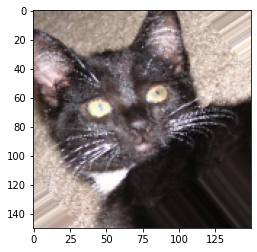

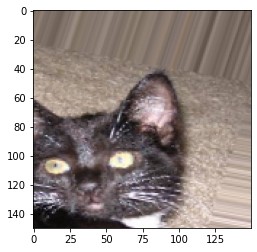

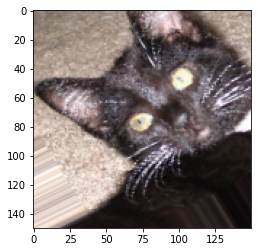

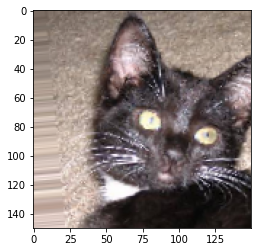

In [ ]:
# 이미지 전처리 유틸리티 모듈
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

# 증식할 이미지 선택합니다
img_path = fnames[5]

# 이미지를 읽고 크기를 변경합니다
img = image.load_img(img_path, target_size=(150, 150))

# (150, 150, 3) 크기의 넘파이 배열로 변환합니다
x = image.img_to_array(img)

# (1, 150, 150, 3) 크기로 변환합니다
x = x.reshape((1,) + x.shape)

# flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성합니다.
# 무한 반복되기 때문에 어느 지점에서 중지해야 합니다!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

데이터 증식을 사용하여 새로운 네트워크를 훈련시킬 때 네트워크에 같은 입력 데이터가 두 번 주입되지 않습니다. 하지만 적은 수의 원본 이미지에서 만들어졌기 때문에 여전히 입력 데이터들 사이에 상호 연관성이 큽니다. 즉, 새로운 정보를 만들어낼 수 없고 단지 기존 정보의 재조합만 가능합니다. 그렇기 때문에 완전히 과대적합을 제거하기에 충분하지 않을 수 있습니다. 과대적합을 더 억제하기 위해 완전 연결 분류기 직전에 `Dropout` 층을 추가하겠습니다:

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau, ModelCheckpoint

#'val_loss'가 줄지 않고 3 EPOCH동안 유지되면 학습율(learningRate를 20%로 줄인다.)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

#'val_loss'가 3EPOCH동안 내려가지 않으면 학습을 중단한다.
es=EarlyStopping(monitor='val_loss', patience=15)

# 학습중에 'val_acc'가 가장 높을때 'cnn_best_model.h5'에 weight값을 저장한다.
mc = ModelCheckpoint('cnn_best_model.h5', monitor='val_acc', mode='max', verbose = 1, save_best_only=True)

callback_list = [reduce_lr, es, mc]

데이터 증식과 드롭아웃을 사용하여 이 네트워크를 훈련시켜 봅시다:

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(IMG_H, IMG_W),
        batch_size=BATCH_SIZE,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(IMG_H, IMG_W),
        batch_size=BATCH_SIZE,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=2000/BATCH_SIZE,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=1000/BATCH_SIZE,
      callbacks=callback_list)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
62/62 [==============================] - 17s 259ms/step - loss: 0.6928 - acc: 0.5170 - val_loss: 0.6846 - val_acc: 0.5000

Epoch 00001: val_acc improved from -inf to 0.50000, saving model to cnn_best_model.h5
Epoch 2/100
62/62 [==============================] - 16s 256ms/step - loss: 0.6856 - acc: 0.5485 - val_loss: 0.6660 - val_acc: 0.5770

Epoch 00002: val_acc improved from 0.50000 to 0.57700, saving model to cnn_best_model.h5
Epoch 3/100
62/62 [==============================] - 16s 258ms/step - loss: 0.6735 - acc: 0.5730 - val_loss: 0.6970 - val_acc: 0.5220

Epoch 00003: val_acc did not improve from 0.57700
Epoch 4/100
62/62 [==============================] - 16s 257ms/step - loss: 0.6628 - acc: 0.5835 - val_loss: 0.6846 - val_acc: 0.5330

Epoch 00004: val_acc did not improve from 0.57700
Epoch 5/100
62/62 [==============================] - 16s 257ms/step - loss: 0.6562 - acc: 0.6045 - va

다음 절에서 이 모델을 사용하기 위해 모델을 저장합니다.

In [ ]:
model.save('cats_and_dogs_small_2.h5')

결과 그래프를 다시 그려 보죠:

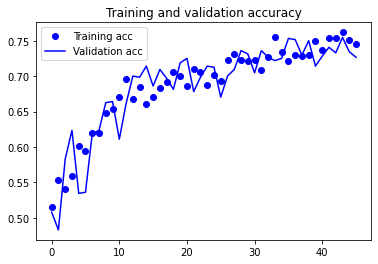

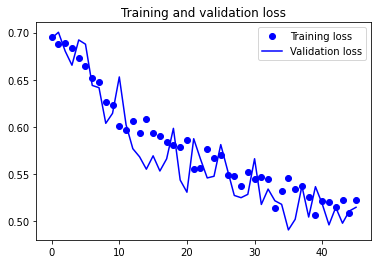

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

그림 5-12와 5-13을 참고하세요. 데이터 증식과 드롭아웃 덕택에 더이상 과대적합되지 않습니다. 훈련 곡선이 검증 곡선에 가깝게 따라가고 있습니다. 검증 데이터에서 82% 정확도를 달성하였습니다. 규제하지 않은 모델과 비교했을 때 15% 정도 향상되었습니다.

다른 규제 기법을 더 사용하고 네트워크의 파라미터를 튜닝하면(합성곱 층의 필터 수나 네트워크의 층의 수 등) 86%나 87% 정도까지 더 높은 정확도를 얻을 수도 있습니다. 하지만 데이터가 적기 때문에 컨브넷을 처음부터 훈련해서 더 높은 정확도를 달성하기는 어렵습니다. 이런 상황에서 정확도를 높이기 위한 다음 단계는 사전 훈련된 모델을 사용하는 것입니다. 다음 두 절에서 이에 대해 집중적으로 살펴보겠습니다.